## Prediction

This notebook demonstrates how to interact with individual predictions for each prompt. 

In the previous segment we generated some predictions, likely by default under the /predict/ folder under the
current working directory. For ease of user access, each prompt's prediction is stored under a "cardinal" or 
representative prompt for that class. For example, all synonymous prompts for "a person walking" may look something
like this:

- predict/
    - a person walking/
        - a person walking.parquet
        - a person strolling.parquet
        - an individual walking.parquet
        - an individual strolling.parquet

We may use `elsa.prediction()` to individually load a prediction file for each prompt:

In [1]:
import pandas as pd

from elsa import Elsa
elsa = Elsa.from_unified()
file = '/home/redacted/Downloads/predictions/a person walking/a person walking.parquet'
pred = elsa.prediction(file=file)
print(pred)


INFO     45 files out of 1019 in the files metadata e.g. ['103330300011223210_x4_cropped', '021000133313010210_x4_cropped', '103331102133121010_x4_cropped', '020310023332310110_x4_cropped', '103330331023330302_x4_cropped', '103330313111031010_x4_cropped', '103331121100233202_x4_cropped', '103331211212203002_x4_cropped', '103331013032333110_x4_cropped', '020310023302013302_x4_cropped'] are not in the image metadata and are being dropped.
WARNING  45 files in [PosixPath('/home/redacted/Downloads/images'), PosixPath('/home/redacted/Downloads/yolo/images')] e.g. 103330300011223210_x4_cropped are not present in the images metadata. These files will be ignored.
INFO     43 files e.g. ['BSV_154', 'BSV_248', 'BSV_130', 'BSV_381', 'BSV_126', 'BSV_339', 'BSV_571', 'BSV_120', 'BSV_60', 'BSV_224'] in the images metadata out of 977 are not in the literal image files and are being dropped.
INFO     Dropping 38 annotations from the truth because they are in the drop_list e.g. ['pet']
INFO     3 files

prediction
token          a    person   walking  normxmin  normxmax  normymin  normymax  \
ifirst         0         2         9                                           
label                alone   walking                                           
cat              condition     state                                           
ilogit                                                                         
0       0.630496  0.636451  0.013145  0.308060  0.365473  0.252226  0.522186   
1       0.374662  0.381496  0.014791  0.184909  0.213028  0.001547  0.139411   
2       0.176735  0.172606  0.005345  0.866213  0.880455  0.138097  0.195461   
3       0.015645  0.017058  0.002512  0.306647  0.382570  0.249738  0.526036   
4       0.079285  0.077217  0.003524  0.185064  0.199429  0.016558  0.136814   
...          ...       ...       ...       ...       ...       ...       ...   
7195    0.028357  0.028755  0.001373  0.431328  0.494281  0.214713  0.318942   
7196    0.017881  0.018579  0

### Column Names

Prediction features multi-level columns: there are four levels that specify a column's name:

- token: The substring that represnts a token. "walking" may be tokenized to "walk" and "ing", and there is a column representing each.
- ifirst: To disambiguate equivalent substrings that have been tokenized, ifirst is the index of the substring in the prompt
- label: The label, from elsa.labels, which the token substring represents.
- cat: The category of the label: condition, state, activity, or others. 
- logit_file: Output path of the prediction logits for a particular prompt.
You can get the values of the column level by selecting the respective attribute e.g. `elsa.cat`


<table>
  <tr>
    <td style="text-align: right;">token</td>
    <td style="text-align: right;">a</td>
    <td style="text-align: right;">person</td>
  </tr>
  <tr>
    <td>ifirst</td>
    <td style="text-align: right;">0</td>
    <td style="text-align: right;">2</td>
    <td></td>
  </tr>
  <tr>
    <td>label</td>
    <td style="text-align: right;"></td>
    <td style="text-align: right;">alone</td>
    <td></td>
  </tr>
  <tr>
    <td>cat</td>
    <td style="text-align: right;"></td>
    <td style="text-align: right;">condition</td>
  </tr>
</table>

You can select the token by using it as a column name e.g. `frame['person']`. However, there might be multiple instances
of a token, so to disambiguate you would pass a tuple, the second being the index: `frame[('person', 2)]`.

### Columns

There are other columns which represent only 

the following columns are of interest:
- ilogit: integer logit identifier for each box predicted with the prompt
- prompt: the (synonymous) prompt that was used to generate the logits
- ifile: string identifier for each file e.g. GSV_1
- file: name of each file
- normxmin: normalized minimum x-coordinate of the bounding box, as a ratio of the image width
    - normw: may be used synonymously as the normalized 'western' bound
- normymin: normalized minimum y-coordinate of the bounding box, as a ratio of the image height
    - norms: may be used synonymously as the normalized 'southern' bound
- normxmax: normalized maximum x-coordinate of the bounding box, as a ratio of the image width
    - norme: may be used synonymously as the normalized 'eastern' bound
- normymax: normalized maximum y-coordinate of the bounding box, as a ratio of the image height
    - normn: may be used synonymously as the normalized 'northern' bound

the following methods are of interest:
- view: View a heatmap of the logits, and/or the bounding boxes of the most confident predictions for that prompt


### Scores
You can access a DataFrame of the all the scores with `prediction.scores.everything`, with an entry for each prediction. To see some summary statistics
of the scores, use `prediction.scores.summaries`


In [4]:
pred.scores.everything

prediction.scores
        whole.loglse  whole.nlse  whole.argmax  selected.loglse  \
ilogit                                                            
0           0.466150    0.466150      0.636451         0.372596   
1           0.271013    0.271013      0.381496         0.214859   
2           0.121353    0.121353      0.176735         0.092469   
3           0.011760    0.011760      0.017058         0.009811   
4           0.053958    0.053958      0.079285         0.041049   
...              ...         ...           ...              ...   
7195        0.019577    0.019577      0.028755         0.015157   
7196        0.012548    0.012548      0.018579         0.009871   
7197        0.009578    0.009578      0.013374         0.007675   
7198        0.009438    0.009438      0.013317         0.007516   
7199        0.010135    0.010135      0.014631         0.007880   

        selected.nlse  selected.argmax  
ilogit                                  
0            0.372596         0.636451  
1            0.214859         0.381496  
2            0.092469         0.172606  
3            0.009811         0.017058  
4            0.041049         0.077217  
...               ...              ...  
7195         0.015157         0.028755  
7196         0.009871         0.018579  
7197         0.007675         0.013361  
7198         0.007516         0.013317  
7199         0.007880         0.014490  

[7200 rows x 6 columns]

In [5]:
pred.scores.summaries

prediction.scores.summaries
       whole.loglse   whole.nlse  whole.argmax  selected.loglse  \
count   7200.000000  7200.000000   7200.000000      7200.000000   
mean       0.012779     0.012779      0.018666         0.010108   
std        0.026961     0.026961      0.038206         0.021319   
min        0.000779     0.000779      0.001061         0.000683   
25%        0.004057     0.004057      0.005848         0.003335   
50%        0.006594     0.006594      0.009644         0.005299   
75%        0.012860     0.012860      0.018974         0.010163   
max        0.545484     0.545484      0.733520         0.436296   

       selected.nlse  selected.argmax  
count    7200.000000      7200.000000  
mean        0.010108         0.018575  
std         0.021319         0.038156  
min         0.000683         0.001061  
25%         0.003335         0.005805  
50%         0.005299         0.009583  
75%         0.010163         0.018866  
max         0.436296         0.731939

## Prediction.view
- score: The score values for which the heatmap will be generated, and the most confident boxes will be chosen
    - 'whole.lse'
    - 'whole.argmax'
    - 'selected.nlse'
    - 'selected.argmax'
    - list: view multiple scores, with the output images stacked
- file: file for which the predictions will be viewed
    - str: visualize the file where ifile or filename matches string
    - int: visualize the nth file; file=5 means the fifth file
- heat: color with which the heatmap is generated
    - None: do not generate a heatmap 
- top: amount of most confident predictions to draw boxes for 
- background: output background
- buffer: width of buffer area for which the text information is displayed

INFO     prediction.path


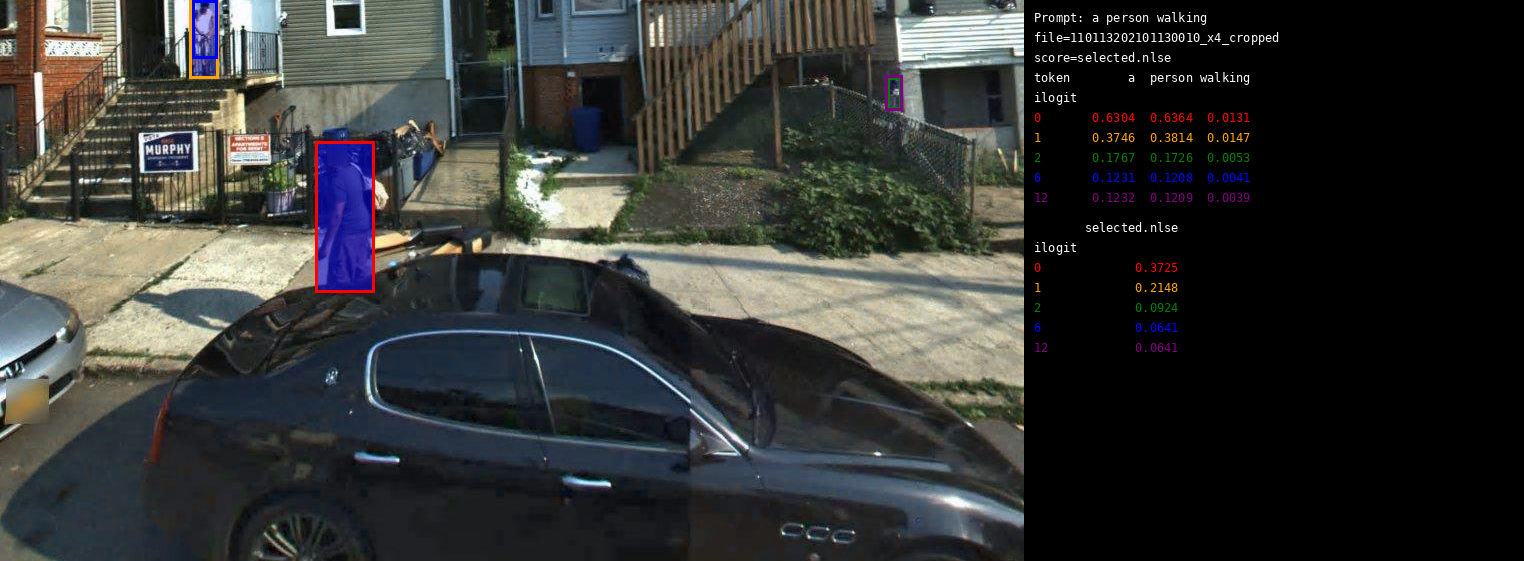

In [11]:
# view the selected.nlse score, which is the score proposed by the paper
# view file # 2
pred.view(
    score='selected.nlse',
    file=0
)

INFO     prediction.path


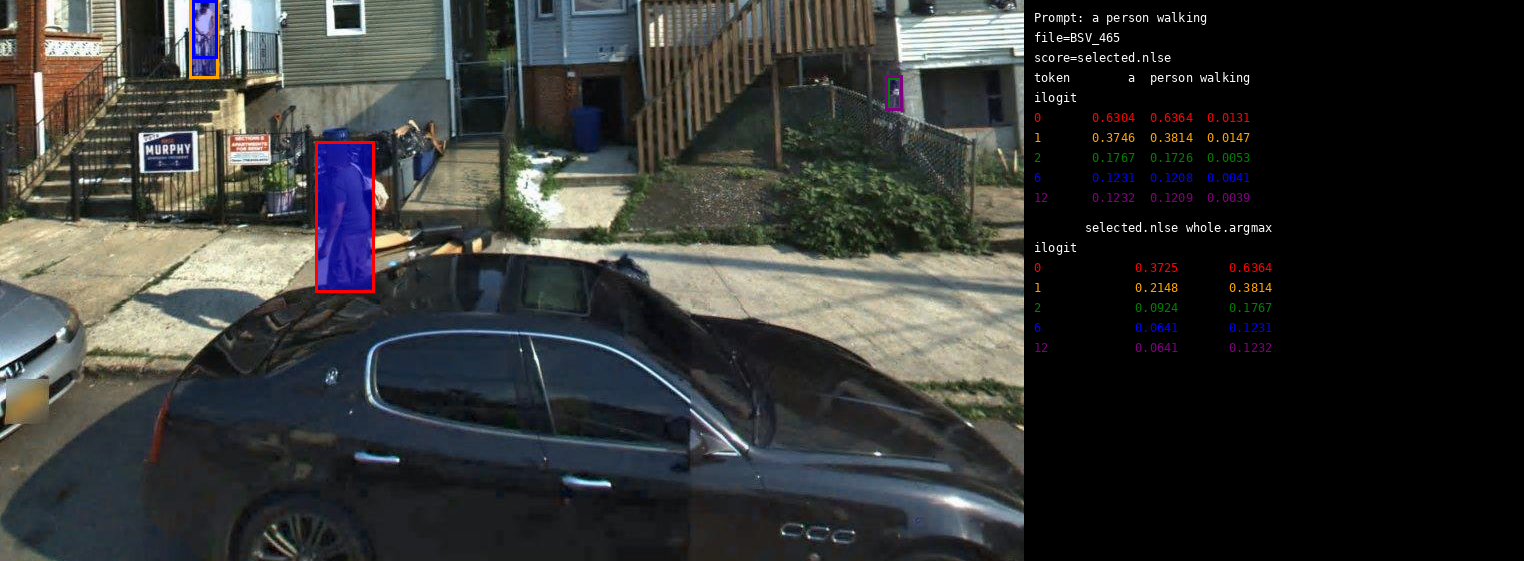

In [15]:
# compare the paper's proposed score to the conventional "whole.argmax" score
# perform this for the file which has BSV_7 as its identifier
pred.view(
    # score=['selected.nlse', 'whole.argmax'],
    score='selected.nlse',
    compare='whole.argmax',
    file='BSV_465'
)

INFO     prediction.path


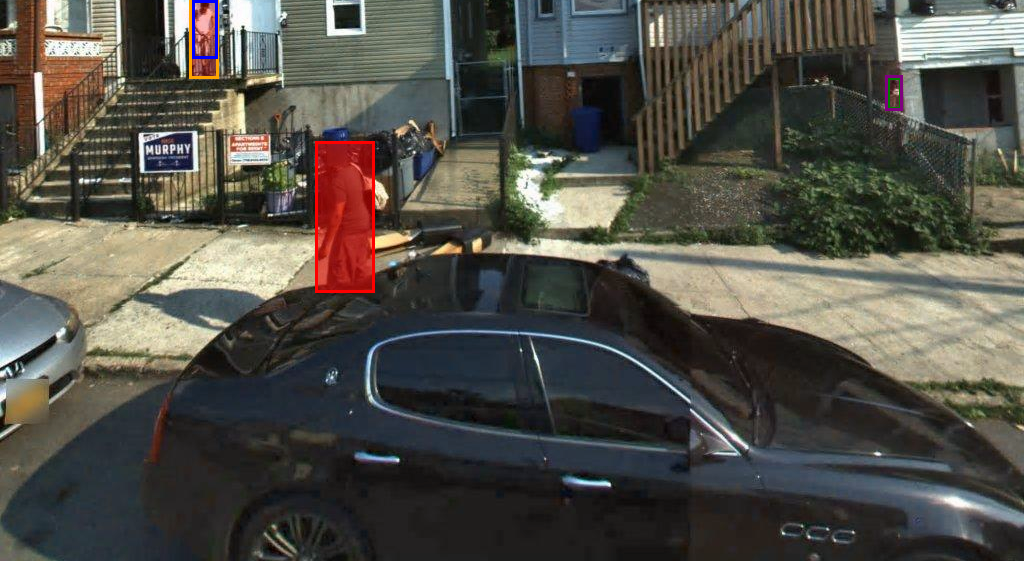

In [2]:
# view a heatmap of the logits from the prediction
# specify top=0 to avoid showing any boxes
# do this for the third file in the predictions
# assign buffer=0 so there isn't any info on the side
pred.view(
    heat='red',
    file=0,
    buffer=0
)

In [3]:

pred.ifile

prediction.ifile
ilogit
0       BSV_465
1       BSV_465
2       BSV_465
3       BSV_465
4       BSV_465
         ...   
7195    BSV_619
7196    BSV_619
7197    BSV_619
7198    BSV_619
7199    BSV_619
Name: ifile, Length: 7200, dtype: category
Categories (8, object): ['BSV_249', 'BSV_387', 'BSV_417', 'BSV_44', 'BSV_465', 'BSV_485', 'BSV_573', 'BSV_619']

In [4]:
pred.ifile.nunique()

8